#### Задание

#### Цель:

Изучить применение моделей кластеризации

#### Описание задания:

В домашнем задании нужно сократить число цветов в палитре изображения.
Картинку для выполнения работы можно выбрать любую, главное условие – 
наличие на ней разных цветов, для того, чтобы результат работы моделей был заметен.
Для выполнения работы необходимо выделить кластеры в пространстве RGB, 
объекты соответствуют пикселям изображения. После выделения кластеров все пиксели,
отнесенные в один кластер, заполняются одним цветом. Цвет – центроид соответствующего кластера.

#### Этапы работы:

1. Получите данные и загрузите их в рабочую среду (Jupyter Notebook или другую).
a) Для отображения картинки воспользуйтесь вспомогательной функцией

2. Реализуйте три модели кластеризации:

a) KMeans. Рассмотрите число кластеров K = 2, 5, 10, 20.

b) DBSCAN

c) AgglomerativeClustering. Рассмотрите число кластеров K = 2, 5, 10, 20.

3. Для каждой модели оцените потери от уменьшения цветов при помощи метрики SSIM.

4. Сформулируйте выводы по проделанной работе.

a) Какая модель показала лучший результат?

Для получения зачета по этому домашнему заданию минимально должно быть реализовано обучение трех моделей с одним и тем же значением кластеров, где такой параметр присутствует.

In [ ]:
pip install opencv-python

In [ ]:
pip install scikit-image opencv-python imutils

In [1]:
import numpy as np
import pandas as pd # Для работы с данными
import scipy.stats # При работе со статистикой
import seaborn as sns
import matplotlib.pyplot as plt
import cv2 
import skimage

from skimage.metrics import structural_similarity as ssim
from PIL import Image

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import adjusted_rand_score, silhouette_score
from scipy.cluster.hierarchy import dendrogram

In [2]:
pic = cv2.imread('pic_cluster.jpg')
pic = cv2.resize(pic, (150, 100))

In [3]:
def draw_picture(image, title, bgr=False):
    b, g, r = cv2.split(image) # по умолчанию cv2 почему-то отдает цвета в порядке BGR вместо RGB
    new_image = cv2.merge([r, g, b])
    plt.figure(figsize=(7, 5))
    plt.axis('off')
    plt.imshow(new_image)
    plt.title(title)
    plt.show()

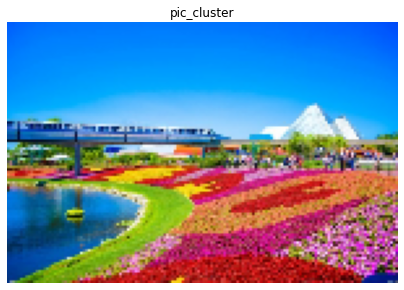

In [4]:
draw_picture(pic, 'pic_cluster')

In [5]:
def mean_square_error(image, seg_image):    
    '''
    Функция представляет собой математический механизм метрики MSE
    '''
    error= np.sum((image.astype("float")- seg_image.astype("float"))**2)
    error= error/float(image.shape[0]*seg_image.shape[1])
    return error

def image_ssim (image, seg_image):
    '''
    Функция представляет вызов метрики MSE и SSIM
    '''    
    m= mean_square_error(image, seg_image)
    s= ssim(image,seg_image, multichannel=True)
    
    print(f'Mean Square error Value is {m:.2f}')
    print(f'Structural Similarity Index Measurement value is {s:.2f}')
    

In [52]:
def kmeans_segmentation(image, n_clusters):
    '''
    Функция принимает на вход цветное изображение и требуемое количество кластеров
    модель K-means сегментирует изображение
    преобразует трехмерный вектор в одномерный
    отрисовывает исходное изображение
    отрисовывает сегментированное изображение
    выводит значения MSE, SSIM
    '''
    kmeans = KMeans(n_clusters=n_clusters, init = 'k-means++',\
                        random_state=0, n_init="auto").fit(image.reshape((-1,3)))
    c = np.uint8(kmeans.cluster_centers_)
    seg_data= c[kmeans.labels_.flatten()]
    seg_image = seg_data.reshape((image.shape))

#     draw_picture(image, 'Before segmentation')
    draw_picture(seg_image, 'After segmentation')
    
    image_ssim (image,seg_image)

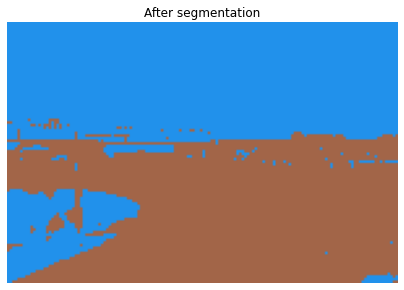

Mean Square error Value is 8244.63
Structural Similarity Index Measurement value is 0.30


In [53]:
kmeans_segmentation(pic, 2)

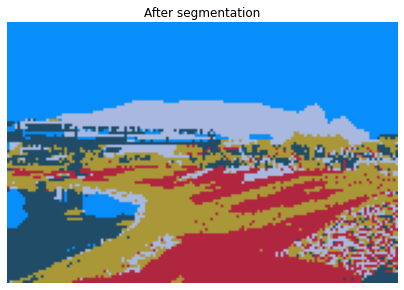

Mean Square error Value is 3277.27
Structural Similarity Index Measurement value is 0.55


In [54]:
kmeans_segmentation(pic, 5)

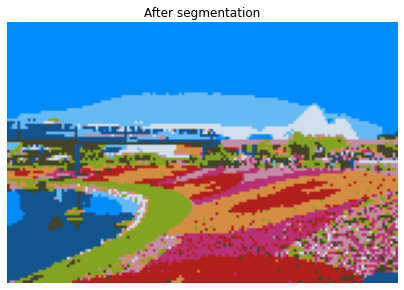

Mean Square error Value is 1577.48
Structural Similarity Index Measurement value is 0.76


In [55]:
kmeans_segmentation(pic, 10)

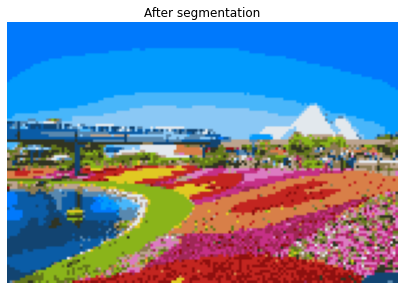

Mean Square error Value is 830.65
Structural Similarity Index Measurement value is 0.84


In [56]:
kmeans_segmentation(pic, 20)

In [47]:
def AgglomerativeClustering_segmentation(image, n_clusters):
    '''
    Функция принимает на вход цветное изображение и требуемое количество кластеров
    модель AgglomerativeClustering сегментирует изображение
    преобразует трехмерный вектор в одномерный
    отрисовывает исходное изображение
    отрисовывает сегментированное изображение
    выводит значения MSE, SSIM
    '''
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward')     
    preds = model.fit_predict(image.reshape(-1,3))
    preds = pd.Series(preds)
    
    
    img_df = pd.DataFrame(image.reshape(-1,3))
    # преобразование исходного изображение в df
    img_df['class'] = preds
    # добавление метки кластера
    img_df = img_df.groupby('class')[[0, 1, 2]].transform('mean')
    # замена цветов кластера на среднее либо медиану
    img_arr = img_df.to_numpy(dtype='uint8')
    # преобразование df в ndarray
    seg_image = img_arr.reshape((pic.shape))
    # преобразование одномерного вектора в трехмерный

#     draw_picture(image, 'Before segmentation')
    draw_picture(seg_image, 'After segmentation')
    
    image_ssim (image,seg_image)

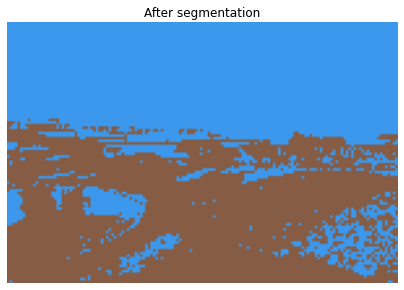

Mean Square error Value is 10094.87
Structural Similarity Index Measurement value is 0.33


In [48]:
AgglomerativeClustering_segmentation(pic, 2)

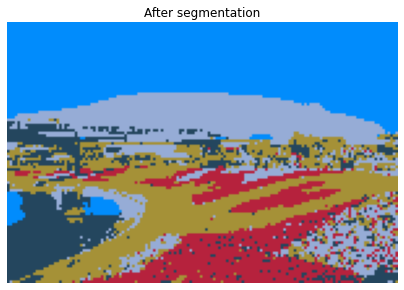

Mean Square error Value is 3976.71
Structural Similarity Index Measurement value is 0.60


In [49]:
AgglomerativeClustering_segmentation(pic, 5)

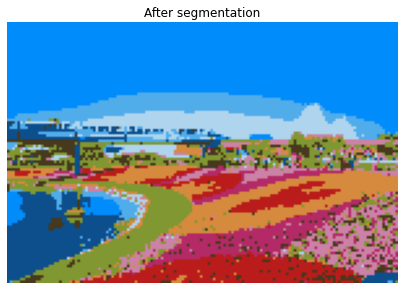

Mean Square error Value is 1861.96
Structural Similarity Index Measurement value is 0.74


In [50]:
AgglomerativeClustering_segmentation(pic, 10)

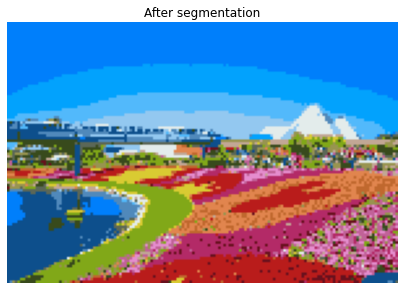

Mean Square error Value is 1030.27
Structural Similarity Index Measurement value is 0.81


In [51]:
AgglomerativeClustering_segmentation(pic, 20)

In [70]:
def DBSCAN_segmentation(image, eps, min_samples):
    '''
    Функция принимает на вход цветное изображение и требует 
    ввода гиперпараметров 
    модель DBSCAN сегментирует изображение
    преобразует трехмерный вектор в одномерный
    отрисовывает исходное изображение
    отрисовывает сегментированное изображение
    выводит значения MSE, SSIM
    '''
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)     
    labels_clast = dbscan.fit_predict(image.reshape(-1,3))
    labels_clast = pd.Series(labels_clast)
    
    
    img_df = pd.DataFrame(image.reshape(-1,3))
    # преобразование исходного изображение в df
    img_df['class'] = labels_clast
    # добавление метки кластера
    img_df = img_df.groupby('class')[[0, 1, 2]].transform('mean')
    # замена цветов кластера на среднее либо медиану
    img_arr = img_df.to_numpy(dtype='uint8')
    # преобразование df в ndarray
    seg_image = img_arr.reshape((pic.shape))
    # преобразование одномерного вектора в трехмерный

#     draw_picture(image, 'Before segmentation')
    draw_picture(seg_image, 'After segmentation')
    
    image_ssim (image,seg_image)

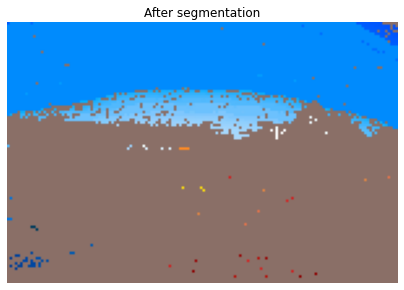

Mean Square error Value is 9662.56
Structural Similarity Index Measurement value is 0.28


In [62]:
DBSCAN_segmentation(pic, 1, 3)

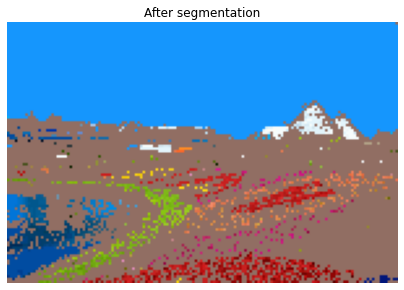

Mean Square error Value is 6932.61
Structural Similarity Index Measurement value is 0.37


In [63]:
DBSCAN_segmentation(pic, 3, 3)

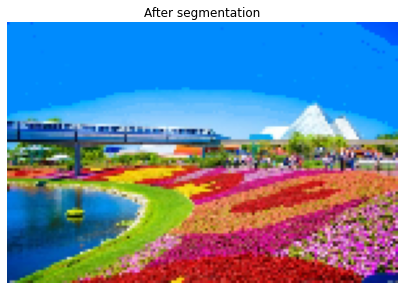

Mean Square error Value is 105.85
Structural Similarity Index Measurement value is 0.96


In [69]:
DBSCAN_segmentation(pic, 1, 1)

KMeans  и AgglomerativeClustering при одинаковых значениях кластеров показали схожие результаты. 
KMeans требует меньше времени для работы, и SSIM выше на несколько единиц. 